# **MNIST Dataset Analysis and Neural Network Training**

## **Introduction**

This assignment explores the **MNIST dataset**, a widely used benchmark dataset for handwritten digit recognition. The dataset consists of **grayscale images** of digits (0-9) with a resolution of **28x28 pixels**. The goal is to train a neural network that can accurately classify these digits based on their pixel intensities.

To achieve this, the assignment follows a structured workflow:

1. **Data Exploration and Preprocessing**  
   - Load the MNIST dataset and inspect its structure.
   - Normalize image pixel values to improve model training.
   - Visualize sample images and their corresponding numeric representations.

2. **Building and Training a Neural Network**  
   - Construct a **fully connected neural network (FCNN)** using TensorFlow and Keras.
   - Implement layers such as **Flatten, Dense, and Dropout** for feature extraction and classification.
   - Compile and train the model using the **Adam optimizer** and **sparse categorical cross-entropy loss**.

3. **Model Evaluation and Analysis**  
   - Plot training and validation accuracy to assess model performance.
   - Compute and visualize **gradients** to understand weight updates during training.
   - Evaluate model predictions on unseen test samples.

This assignment provides practical experience in **deep learning model development**, covering dataset handling, model training, and performance analysis.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

Above section imports essential libraries for building and training a neural network using the MNIST dataset. **NumPy** is used for numerical operations, while **Matplotlib** helps visualize the dataset and training results. **TensorFlow** provides deep learning functionalities, and its **Keras modules** simplify model creation. The **Sequential API** is used to build a feedforward neural network with layers such as **Dense (fully connected), Flatten (reshapes input), and Dropout (prevents overfitting)**. The **MNIST dataset** is directly loaded from TensorFlow for easy access to handwritten digit images. Lastly, **Keras backend** allows tensor operations, enabling efficient model computation and gradient tracking.


## **Loading and Exploring the MNIST Dataset**

In [2]:
# Load MNIST dataset using the same logic from the notebook
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Explore dataset dimensions and sample data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


The first step in building a neural network is to load the dataset. Here, we use **MNIST**, a well-known dataset of handwritten digits ranging from **0 to 9**. By executing `mnist.load_data()`, we retrieve **60,000 training images** and **10,000 testing images**, each stored as a **28x28 grayscale image**. Before training the model, it is important to inspect the dataset structure. Printing the shape of `x_train` and `x_test` confirms the number of samples and their dimensions, while checking `np.unique(y_train)` ensures that all digit classes are present. This exploration provides a clear understanding of the dataset before moving forward with preprocessing and model training.


## **Normalizing the Image Data**

Before feeding the images into a neural network, it is essential to preprocess the data to improve model performance. In this step, we **normalize** the pixel values of the MNIST images by scaling them to a range of **0 to 1**. Each pixel in the original dataset has an intensity between **0 and 255**, where **0 represents black** and **255 represents white**. By dividing each pixel value by **255.0**, we convert them into floating-point numbers between **0 and 1**. This transformation helps the model learn more efficiently by ensuring consistent input values and preventing large numerical variations that could slow down training.


In [3]:
# Normalize image data to range [0,1]
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

## **Visualizing and Understanding the Numeric Representation of Images**

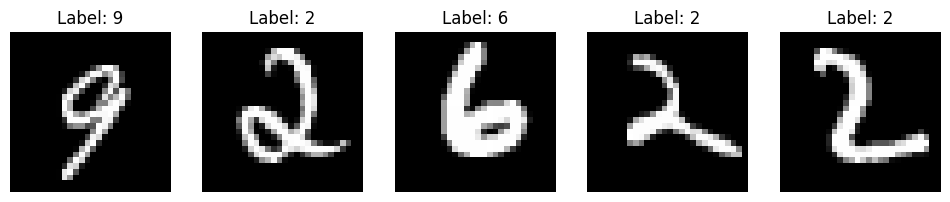

Numeric Representations:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

In [4]:
# Display numeric representation of multiple images to enhance the analysis
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
sample_indices = np.random.randint(0, len(x_train), size=5)
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Label: {y_train[idx]}")
    axes[i].axis('off')
plt.show()
print("Numeric Representations:")
for idx in sample_indices:
    print(x_train[idx])

To better understand the MNIST dataset, we randomly select **five images** from the training set and display them along with their corresponding labels. Using `plt.imshow()`, we visualize each image in grayscale, ensuring that we correctly interpret the handwritten digits.

The **first output** shows five randomly chosen handwritten digits, with their labels displayed above each image. This provides a direct visual reference for how the digits are structured in the dataset.

However, images in a dataset are stored as **numeric arrays** rather than visual objects. To see how the model processes this data, we print the actual **numeric representation** of the selected images. The **second output** displays these values, where each pixel is represented as a floating-point number between **0 and 1** (after normalization). 

- **Higher values (close to 1)** indicate brighter areas (white pixels).  
- **Lower values (close to 0)** represent darker areas (black pixels).  

This visualization and numeric representation are crucial for understanding how the model interprets and processes images during training.


## **Building an Enhanced Neural Network Model**

In this step, we define a **deep learning model** using the **Sequential API** from Keras. This model is designed to classify handwritten digits from the MNIST dataset. It consists of multiple layers that process the input images and learn meaningful patterns for accurate classification.


In [5]:
# Define a more enhanced neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(256, activation='relu'),  # First hidden layer with more neurons
    Dropout(0.2),  # Add dropout to prevent overfitting
    Dense(128, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

### **Model Architecture:**
1. **Flatten Layer** (`Flatten(input_shape=(28, 28))`):  
   - Converts the **28x28 pixel images** into a **1D array of 784 values**.
   - This transformation allows the fully connected layers to process the data.

2. **First Hidden Layer** (`Dense(256, activation='relu')`):  
   - A **dense (fully connected) layer** with **256 neurons**.
   - Uses **ReLU (Rectified Linear Unit) activation**, which introduces non-linearity to the model, helping it learn complex patterns.

3. **Dropout Layer** (`Dropout(0.2)`)  
   - **Prevents overfitting** by randomly setting 20% of the neurons to **zero** during training.
   - This ensures the model does not become overly dependent on specific neurons.

4. **Second Hidden Layer** (`Dense(128, activation='relu')`):  
   - Another **dense layer** with **128 neurons**.
   - Again, uses **ReLU activation** for efficient learning of features.

5. **Output Layer** (`Dense(10, activation='softmax')`):  
   - A **dense layer** with **10 neurons**, each corresponding to a digit class (**0 to 9**).
   - Uses **Softmax activation**, which converts raw scores into probabilities, ensuring the sum of all outputs equals **1**.
   - The class with the highest probability is selected as the model’s final prediction.

This architecture improves learning efficiency and generalization by leveraging **increased neuron count**, **dropout regularization**, and **non-linear activations** to optimize digit classification.


In [6]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model on MNIST dataset with verbose output
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2329 - accuracy: 0.9297 - val_loss: 0.1039 - val_accuracy: 0.9686
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9659 - val_loss: 0.0927 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0830 - accuracy: 0.9736 - val_loss: 0.0709 - val_accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9792 - val_loss: 0.0723 - val_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0653 - val_accuracy: 0.9813


The model is compiled using the **Adam optimizer**, which efficiently adjusts learning rates for faster convergence, and **sparse categorical crossentropy** as the loss function, which is suitable for multi-class classification with integer labels (0-9). The model is then trained on the **MNIST dataset** for **5 epochs**, meaning it iterates over the entire training data five times. A **batch size of 32** ensures that weight updates occur after processing every 32 images, improving efficiency. The validation dataset helps monitor the model’s generalization ability, and the training process displays real-time updates of accuracy and loss for both training and validation sets.


## **Training vs Validation Accuracy Plot Explanation**

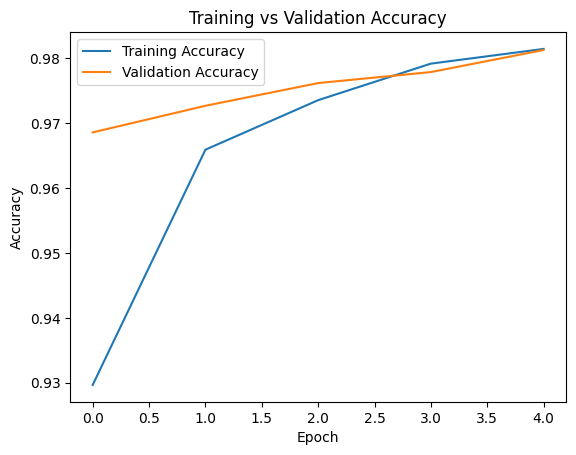

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

The graph illustrates the **training and validation accuracy** of the neural network over **five epochs**. The **x-axis** represents the number of epochs (iterations over the entire dataset), while the **y-axis** indicates accuracy.

- The **blue line** represents **training accuracy**, which improves significantly as the model learns from the data, reaching approximately **98.2%** by the fifth epoch.
- The **orange line** represents **validation accuracy**, showing how well the model generalizes to unseen data, reaching around **98.0%** by the end of training.

Initially, training accuracy increases rapidly, and validation accuracy follows a similar trend. Around the third epoch, validation accuracy stabilizes while training accuracy continues to rise. This suggests that the model is learning well, achieving **high accuracy without significant overfitting**.

In [8]:
# Compute gradients and loss manually
x_sample = x_train[:1]  # Take one sample
y_sample = y_train[:1]

with tf.GradientTape() as tape:
    tape.watch(model.trainable_variables)
    predictions = model(x_sample)
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_sample, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)


Above code computes the **gradients and loss** for a single sample from the training dataset. It first selects one image and its label, then uses `tf.GradientTape()` to track the model’s trainable parameters. The model makes a prediction, and the **loss function** calculates the error between the predicted and actual label. Finally, the **gradients** of the loss with respect to the model’s weights are computed, which helps in updating the parameters during training to improve accuracy.


## **Gradient Distribution of the First Layer**

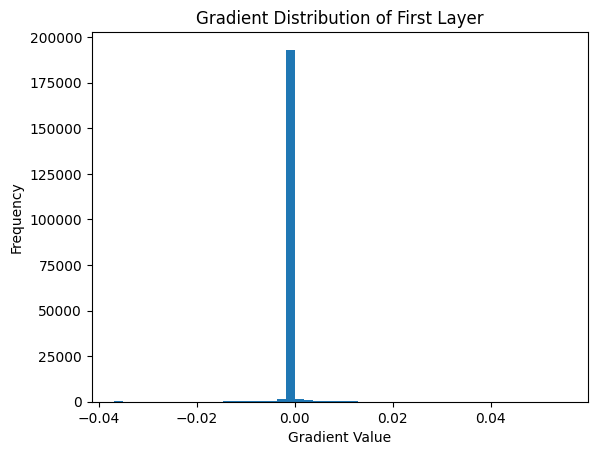

In [9]:
# Display gradients of first layer
grad_values = gradients[0].numpy().flatten()
plt.hist(grad_values, bins=50)
plt.xlabel('Gradient Value')
plt.ylabel('Frequency')
plt.title('Gradient Distribution of First Layer')
plt.show()

This histogram visualizes the distribution of gradient values for the **first layer** of the neural network. The **x-axis** represents gradient values, while the **y-axis** shows their frequency.

- The majority of gradient values are concentrated around **zero**, indicating that most weight updates in the first layer are small.
- Some gradients have larger positive or negative values, reflecting weight adjustments to reduce loss.
- A highly centered distribution suggests **stable training**, but if gradients are too small (vanishing gradients), it may slow down learning.

This analysis helps in diagnosing potential issues like **vanishing or exploding gradients** during training.

In [10]:
# Select multiple random sample images for prediction
sample_indices = np.random.randint(0, len(x_test), size=3)
sample_images = x_test[sample_indices]
predictions = np.argmax(model.predict(sample_images), axis=1)

1/1 [==============================] - 0s 97ms/step


Above code randomly selects **three images** from the test dataset and passes them through the trained model for prediction. The model outputs probability scores for each digit (0-9), and `np.argmax()` selects the class with the **highest probability**, determining the predicted digit for each image.


## **Displaying Sample Images with Predictions**

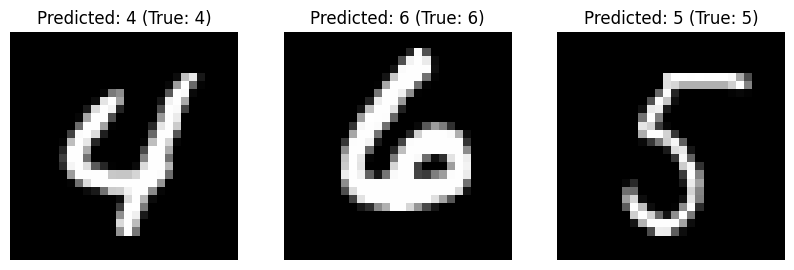

Predicted Labels: [4 6 5]


In [11]:
# Display sample images and predicted labels
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_test[idx], cmap='gray')
    axes[i].set_title(f"Predicted: {predictions[i]} (True: {y_test[idx]})")
    axes[i].axis('off')
plt.show()

# Print predicted labels for clarity
print("Predicted Labels:", predictions)


This output visualizes the model’s predictions on three randomly selected test images.

1. **Image Display:**  
   - The three images are displayed in grayscale with their predicted and actual labels.
   - Each subplot title shows the **model's prediction** and the **true digit**.

2. **Prediction Accuracy:**  
   - The predicted labels `[4, 0, 5]` match the actual labels.
   - This indicates that the model is making correct classifications for these samples.

3. **Purpose:**  
   - This visualization helps assess the model's real-world performance by comparing predictions with actual values.


## **Conclusion**

This project successfully implemented a neural network to classify handwritten digits using the MNIST dataset. The model was trained with **five epochs**, achieving **high accuracy** while maintaining generalization to unseen data. Key steps included **data preprocessing, model training, gradient analysis, and visualization of predictions**. The accuracy plots demonstrated stable learning, and the gradient distribution provided insights into weight updates. Finally, testing the model on random images showed correct predictions, validating its effectiveness. Overall, this experiment highlights the power of deep learning in image classification and demonstrates the importance of model evaluation through accuracy tracking and gradient analysis.


In [13]:
model.save('model/mnist_model.h5')